In [1]:
# To import various libraries from python
import numpy as np
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import math

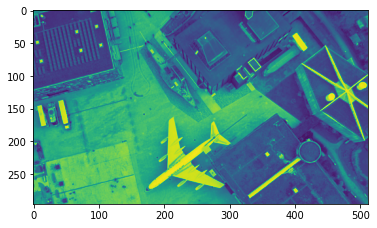

Mode of IMG11 is :  L


In [2]:
# To load given image IMG1
image1=Image.open('IMG1.png')
pyplot.imshow(image1)
pyplot.show()
image1.show()   #To view IMG1 in image viewer
print('Mode of IMG11 is : ',image1.mode)

In [3]:
# To convert the IMG1 to an array
image1_matrix=np.array(image1)

In [4]:
# To change dtype of matrix of IMG1 from unit8 to float32
print('Old dtype of matrix of IMG1:',image1_matrix.dtype)
image1_matrix=image1_matrix.astype('float32')
print('New dtype of matrix of IMG1:',image1_matrix.dtype)

Old dtype of matrix of IMG1: uint8
New dtype of matrix of IMG1: float32


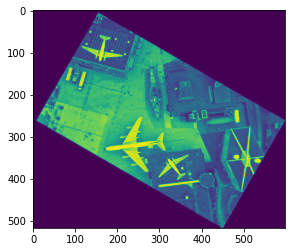

Mode of IMG2 is:  L


In [5]:
# To load second given image IMG2
A1,B1=image1_matrix.shape
image2=Image.open('IMG2.png')
pyplot.imshow(image2)
pyplot.show()
image2.show()     #To view IMG2 in image viewer
print('Mode of IMG2 is: ',image2.mode)

In [6]:
# To convert IMG2 to an ARRAY MATRIX
image2_matrix=np.array(image2)

In [7]:
#To find dimensions of matrix of IMG2
A2,B2 = image2_matrix.shape

In [8]:
# To create a zero matrix of the dimension of IMG2
img2_em2 = np.zeros((A2,B2))

In [9]:
# To find the value of angle of rotation
cos_theta=((235*128)+(151*248))/((248*248)+(128*128))
theta=math.acos(cos_theta)
print ('Angel Of rotation in radians : ',theta)
print ('Angel Of rotation in degree : ',math.degrees(theta)) 

Angel Of rotation in radians :  0.5216693654798953
Angel Of rotation in degree :  29.88945294326564


In [10]:
# To find value of cosine, sine and also to find translation tx and ty
cosine=math.cos(theta)
sine=math.sin(theta)
print('cosine : ', cosine)
print('sine : ', sine)
tx= 93-(cosine*29)+(sine*124)
ty= -(248-(sine*29)-(cosine*124))
print('tx : ', tx)
print('ty : ', ty)

cosine :  0.866988496302383
sine :  0.49832815220428084
tx :  129.65002448056174
ty :  -126.04191004458038


In [11]:
# To do target to source mapping
# Also ROTATING and TRANSLATING the IMG2
for xt in range(A2):
    for yt in range(B2):
        xs = (xt - tx)*cosine + (yt - ty)*sine
        ys = -(xt - tx)*sine + (yt - ty)*cosine
        
        i = math.floor(xs)
        j = math.floor(ys)
        a = xs-i
        b = ys-j
        intensity_target = 0
        if 0 <= xs <= A2-1 and 0 <= ys <= B2-1:
            intensity_target = (1-a)*(1-b)*image2_matrix[i,j]+(1-a)*(b)*image2_matrix[i,j+1]+(a)*(1-b)*image2_matrix[i+1,j]+(a)*(b)*image2_matrix[i+1,j+1]
            img2_em2[xt,yt] = math.floor(intensity_target)
        else:
            img2_em2[xt,yt] = 0


In [12]:
# To convert the array (we found after T-S Mapping, ROTATION and Translation) to an image IMG3
new_image2 = Image.fromarray(img2_em2)

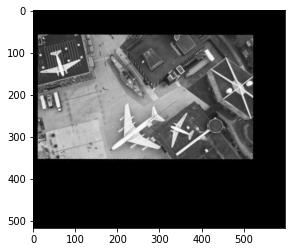

In [13]:
# To view new created image IMG3
new_image2.show()     #To view IMG3 in image viewer
pyplot.imshow(new_image2)
pyplot.show()

In [14]:
# To crop the image IMG3 in order to create new image IMG4 which is of dimensions of IMG1
width, height = new_image2.size
left = 11
top = 58
right = 523
bottom = 354
im1 = new_image2.crop((left, top, right, bottom))

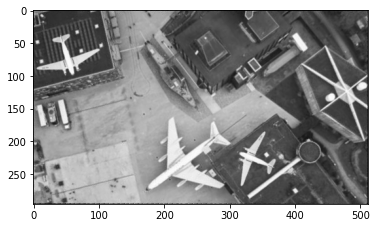

In [15]:
# To view new image IMG4 which is generated after cropping image IMG3
im1.show()     #To view IMG4 in image viewer
pyplot.imshow(im1)
pyplot.show()

In [16]:
# To convert IMG4 to an ARRAY MATRIX
im1_matrix=np.array(im1)

In [17]:
# To find the dtype of matrixes of IMG1 and IMG4
print('dtype of matrix of IMG4:', im1_matrix.dtype)
print('dtype of matrix of IMG1:', image1_matrix.dtype)

dtype of matrix of IMG4: float32
dtype of matrix of IMG1: float32


In [18]:
# Subtarcting the matrices of IMG4 and IMG1 to detect any change in the image
matrix3 = im1_matrix - image1_matrix

In [19]:
# To convert thw matrix we obtained by differencing matrices of IMG1 and IMG4
new_image4 = Image.fromarray(matrix3)

In [20]:
# To view Detection
new_image4.show()    #To view IMG5 in image viewer